In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
import subprocess as sub 
import pandas as pd 
import hdbscan
import arborx

## Plotting specs 
%config InlineBackend.figure_format = 'svg'

sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plt.style.use('ggplot')
plot_kwds = {'alpha' : 0.66, 's' : 50, 'linewidths':1}

datasets/twoD.pts 4
Running: ../../build/ArborX_HDBSCAN.exe datasets/twoD.pts 4
b''


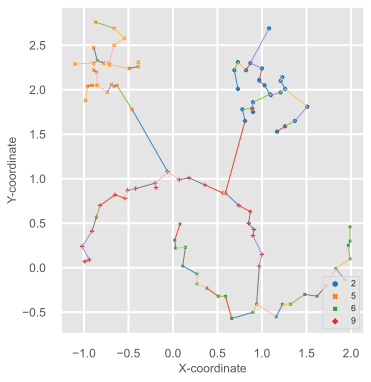

In [3]:
## Testing the module 
binfile ="../../build/ArborX_HDBSCAN.exe"
twoD100= "datasets/twoD.pts"
arborx.plotCluster(binfile,twoD100, 4)

No handles with labels found to put in legend.


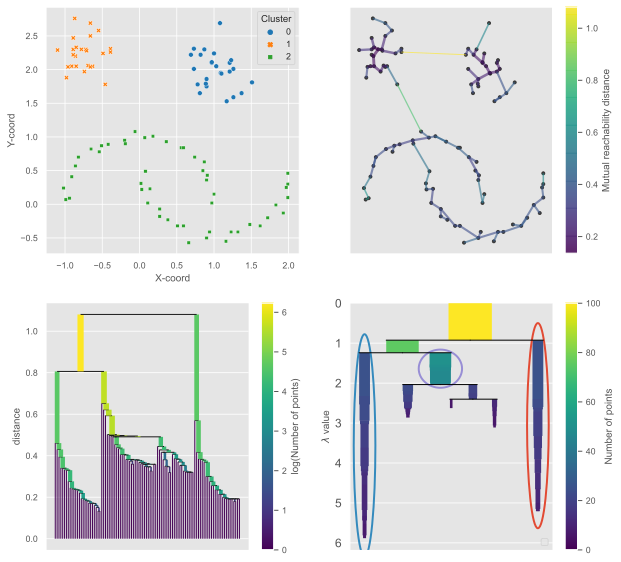

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [4]:
arborx.plotSktHdbscan(twoD100)

## converting .npy to our format

```py 
data = np.load('datasets/clusterable_data.npy')
npts = data.shape[0]
data_dim = data.shape[1]
header="%d %d"%(data.shape[0], data.shape[1])
ptsFileName ="datasets/clusterable_data.pts" 
np.savetxt(ptsFileName, data, fmt='%.6f', delimiter='\t', newline='\n', header=header, footer='', comments='# ', encoding=None)
```

In [5]:
clusterData = "datasets/clusterable_data.pts"
arborx.plotSktHdbscan(clusterData,min_cluster_size=15)

No handles with labels found to put in legend.


No handles with labels found to put in legend.


Writing mst to datasets/clusterable_data.pts-skt.mst
Running: ../build/ArborX_mst2cluster.exe datasets/clusterable_data.pts-skt.mst 15


<AxesSubplot:xlabel='X-coord', ylabel='Y-coord'>

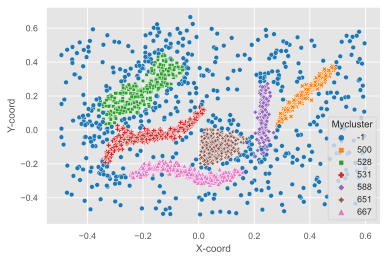

In [17]:
# binfile ="../../build/ArborX_HDBSCAN.exe"
clusterData ="datasets/clusterable_data.pts"
arborx.plotSktHdbscan(clusterData,min_cluster_size=15, writeMST=True)
binaryExe = "../build/ArborX_mst2cluster.exe"
min_cluster_size=15
mstFile = clusterData+"-skt.mst"
cmd  = binaryExe + " " + mstFile + " %d"%(min_cluster_size)
try:
    print("Running: " + cmd)
    out = sub.check_output(cmd,shell=True)
    
except sub.CalledProcessError as e:
    print(e.output)

clstFile = mstFile+".map"
myClst = np.loadtxt(clstFile, dtype="int")
dataPoints = np.loadtxt(clusterData, dtype="double", comments="#")
df = pd.DataFrame(dataPoints)
df.columns = ["X-coord","Y-coord"]
df["Mycluster"] = myClst
sns.scatterplot(data=df, x="X-coord", y="Y-coord", hue="Mycluster", style="Mycluster", palette="tab10")

## Generating a better dataset 

```py
blobs, _ = data.make_blobs(n_samples=300, centers=[(1,0), (1.5, 1.432), (2, -.1414)], cluster_std=0.23)
plt.scatter(blobs.T[0], blobs.T[1], color='b', **plot_kwds)
header="%d %d"%(blobs.shape[0], blobs.shape[1])
np.savetxt("datasets/threeBlobs300.pts", blobs, fmt='%.2f', delimiter='\t', newline='\n', header=header, footer='', comments='# ', encoding=None)
plt.show()
```

No handles with labels found to put in legend.


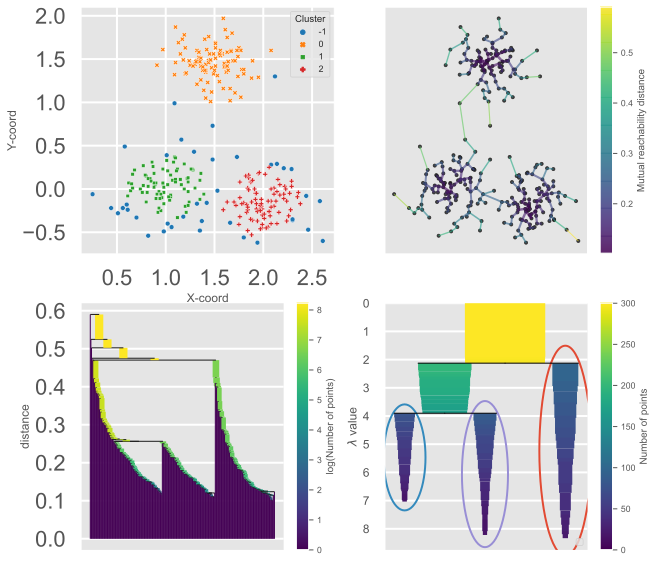

Writing mst to datasets/threeBlobs300.pts-skt.mst


In [10]:
threeBlobs = "datasets/threeBlobs300.pts"

arborx.plotSktHdbscan(threeBlobs,min_cluster_size=15, writeMST=True)

Running: ../build/ArborX_mst2cluster.exe datasets/threeBlobs300.pts-skt.mst 15


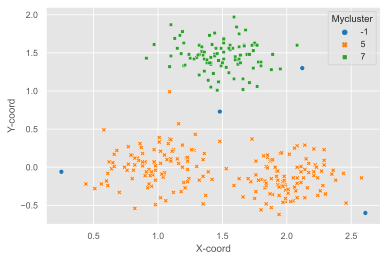

In [12]:
binaryExe = "../build/ArborX_mst2cluster.exe"
min_cluster_size=15
ptsFile="datasets/threeBlobs300.pts"
mstFile = ptsFile+"-skt.mst"
def plotClusterFromMST(binaryExe, mstFile,ptsFile, min_cluster_size=5):
    cmd  = binaryExe + " " + mstFile + " %d"%(min_cluster_size)
    try:
        print("Running: " + cmd)
        out = sub.check_output(cmd,shell=True)
        
    except sub.CalledProcessError as e:
        print(e.output)

    clstFile = mstFile+".map"
    myClst = np.loadtxt(clstFile, dtype="int")
    dataPoints = np.loadtxt(ptsFile, dtype="double", comments="#")
    df = pd.DataFrame(dataPoints)
    df.columns = ["X-coord","Y-coord"]
    df["Mycluster"] = myClst
    sns.scatterplot(data=df, x="X-coord", y="Y-coord", hue="Mycluster", style="Mycluster", palette="tab10")
    plt.show()

plotClusterFromMST(binaryExe, mstFile, ptsFile, min_cluster_size)

Running: ../build/ArborX_mst2cluster.exe datasets/threeBlobs300.pts-skt.mst 15


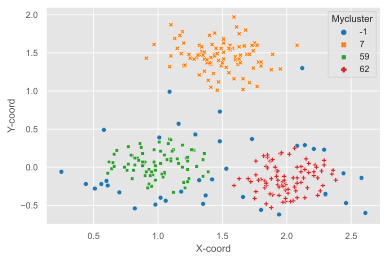

In [16]:
plotClusterFromMST(binaryExe, mstFile, ptsFile, min_cluster_size)

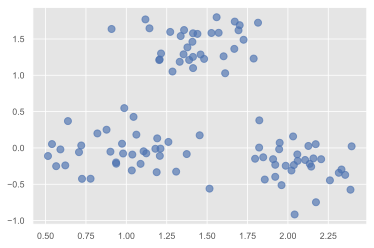

In [15]:
blobs, _ = data.make_blobs(n_samples=100, centers=[(1,0), (1.5, 1.432), (2, -.1414)], cluster_std=0.23)
plt.scatter(blobs.T[0], blobs.T[1], color='b', **plot_kwds)
header="%d %d"%(blobs.shape[0], blobs.shape[1])
np.savetxt("datasets/threeBlobs100.pts", blobs, fmt='%.2f', delimiter='\t', newline='\n', header=header, footer='', comments='# ', encoding=None)
plt.show()

In [29]:
def compareSolution(A, B):
    A2B = {}    # empty dictionary 
    
    if(A.shape[0] != B.shape[0]):
        print("Input array size mismatch")
        return -1;
    n = A.shape[0]
    count =0; 
    for i in list(range(n)):
        if (A[i] in A2B.keys()):
            if(A2B[A[i]] != B[i]):
                count = count +1;
                print("Error at %d"%(i));
        else:
            A2B[A[i]] = B[i];
    if(count==0):
        print("Check successful")
    return count; 

In [20]:
myClst.shape[0]


2309

In [5]:
clusterData ="datasets/clusterable_data.pts"
min_cluster_size=15; 
clusterer = hdbscan.HDBSCAN(min_cluster_size, gen_min_span_tree=True)
dataPoints = np.loadtxt(clusterData, dtype="double", comments="#")
clusterer.fit(dataPoints)
sktClst = clusterer.labels_

In [6]:
sktClst

array([ 5,  5,  5, ..., -1, -1,  5])

In [9]:
clusterer.minimum_spanning_tree_._mst.shape

(2308, 3)

In [30]:
compareSolution(myClst, sktClst)

Check successful


0

In [34]:
A=np.array([9,2,0,2,9,9]);
# // std::vector<int> B({1,4,3,4,1,1});
# B = np.array([1,4,3,4,1,1]) # correct solution 
B = np.array([1,4,3,4,1,4]);
compareSolution(A,B)

Error at 5


1

In [13]:
np.random.rand(10,3)

array([[0.30623517, 0.60174149, 0.31159247],
       [0.22729025, 0.63160517, 0.09444897],
       [0.57755213, 0.19241267, 0.90945559],
       [0.970173  , 0.37925214, 0.27502051],
       [0.30501065, 0.0067212 , 0.83943676],
       [0.38770565, 0.03755761, 0.41422718],
       [0.6419482 , 0.10939763, 0.9752219 ],
       [0.8259857 , 0.61256184, 0.9350086 ],
       [0.51458421, 0.72864807, 0.82965372],
       [0.12948204, 0.02381216, 0.93198342]])